## Testing Articulos-v5 TODOS

In [1]:
%load_ext autoreload
%autoreload 2
import json

with open("../../dumps/news-all-v5.json") as f:
    arts = json.load(f)

In [2]:
len(arts)

337428

In [3]:
arts[0].keys()

dict_keys(['_id', 'tweet_id', 'text', 'slug', 'title', 'url', 'user', 'body', 'created_at', 'comments'])

/home/jmperez/.local/share/virtualenvs/hatespeech-collection-qaK7Gomm/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


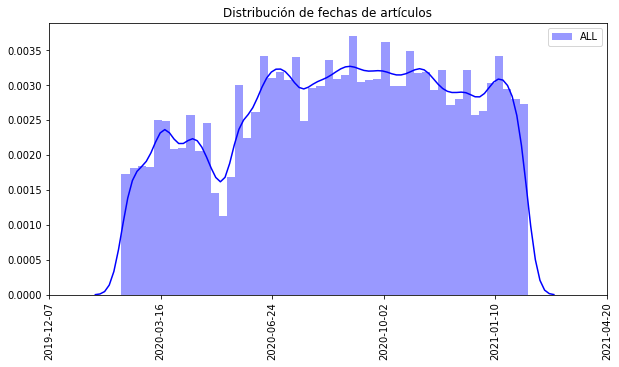

In [4]:
from hate_collector.plot import distplot_dates
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))

distplot_dates([d["created_at"]["$date"] for d in arts], color="blue", label="ALL")
plt.legend()

plt.title("Distribución de fechas de artículos");


Casi dos meses más de datos

Fecha mínima: 10 de Febrero de 2020

Fecha máxima: 22 de Sept   de 2020


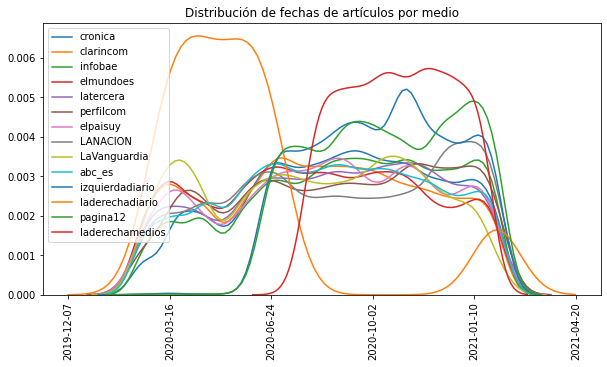

In [5]:
from collections import defaultdict
import datetime

dates_by_newspaper = defaultdict(list)

#blacklist = ["laderechamedios", "pagina12", "izquierdadiario", "laderechadiario"]
blacklist = []
for art in arts:
    if art["user"] in blacklist:
        continue
    date = datetime.datetime.strptime(art["created_at"]["$date"], "%Y-%m-%dT%H:%M:%SZ")
    dates_by_newspaper[art["user"]].append(date)
    

plt.figure(figsize=(10, 5))

for newspaper, dates in dates_by_newspaper.items():
    distplot_dates(dates, label=newspaper, hist=False)
    
plt.legend()
plt.title("Distribución de fechas de artículos por medio");

plt.savefig("fechas_por_medios_todas.png")


In [7]:
from collections import Counter

counter = Counter(art["user"] for art in arts)


keys = sorted(counter.keys())

for k in counter:
    print(f"{k:<15} -- {counter[k]:<5}")

cronica         -- 34072
clarincom       -- 48883
infobae         -- 72065
elmundoes       -- 31709
latercera       -- 11148
perfilcom       -- 14598
elpaisuy        -- 19675
LANACION        -- 30081
LaVanguardia    -- 21206
abc_es          -- 39112
izquierdadiario -- 5582 
laderechadiario -- 823  
pagina12        -- 7112 
laderechamedios -- 1362 
